<a href="https://colab.research.google.com/github/Nayal17/Opencv-Starter/blob/main/Edge_Detection_%5BCanny_from_Scratch%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [234]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Edge Detection

In [235]:
import cv2
import numpy as np
import scipy
import matplotlib.pyplot as plt

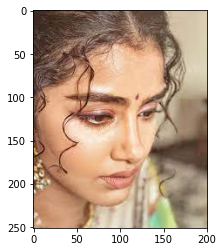

In [236]:
img = cv2.imread("/content/actress.jpg")
rgb_image = img[:,:,::-1]
plt.imshow(rgb_image)
plt.show()

Let's start with moving average filter. This will remove sharpness from the image and we will have smoother image which will be a blurry image. Blurring it with cv2.GaussianBlur we can call it gaussian smoothing which removes noise from the image.

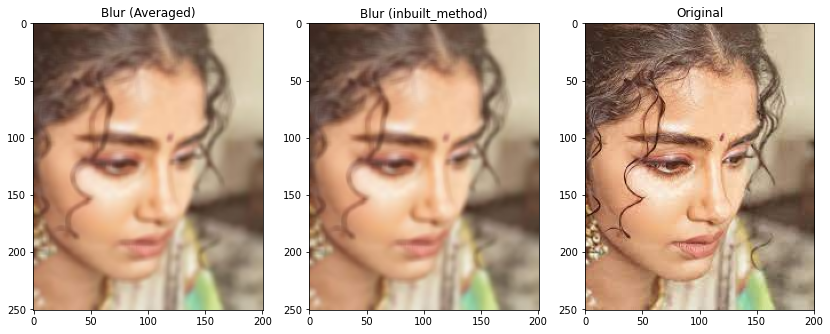

In [237]:
filter = np.ones((5,5),dtype=np.float32)/25 # kernel to average pixel values of window
averaged_img = cv2.filter2D(rgb_image,-1,filter) # convolve #-1 for same depth as of the source

# using cv2 inbuilt blur method 
cv_blur = cv2.blur(rgb_image,(5,5))

plt.figure(figsize=(14,10))
plt.subplot(131);plt.imshow(averaged_img); plt.title("Blur (Averaged)");
plt.subplot(132);plt.imshow(cv_blur); plt.title("Blur (inbuilt_method)");
plt.subplot(133);plt.imshow(rgb_image); plt.title("Original");

plt.show()

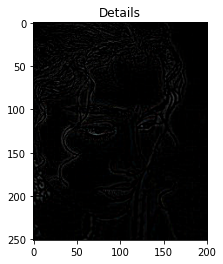

In [238]:
# details of the image
'''
details = original - blurred
'''
details = cv2.subtract(rgb_image,averaged_img)
plt.imshow(details);plt.title("Details")
plt.show()

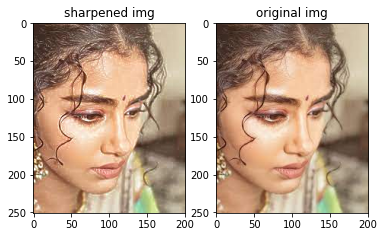

In [239]:
# Sharpened image
'''
sharpned img = original + details(edges)
'''
sharp_img = cv2.add(rgb_image, details)
plt.subplot(121);plt.imshow(sharp_img);plt.title("sharpened img");
plt.subplot(122);plt.imshow(rgb_image);plt.title("original img");

Laplacian Edge Detection (First Derivative)

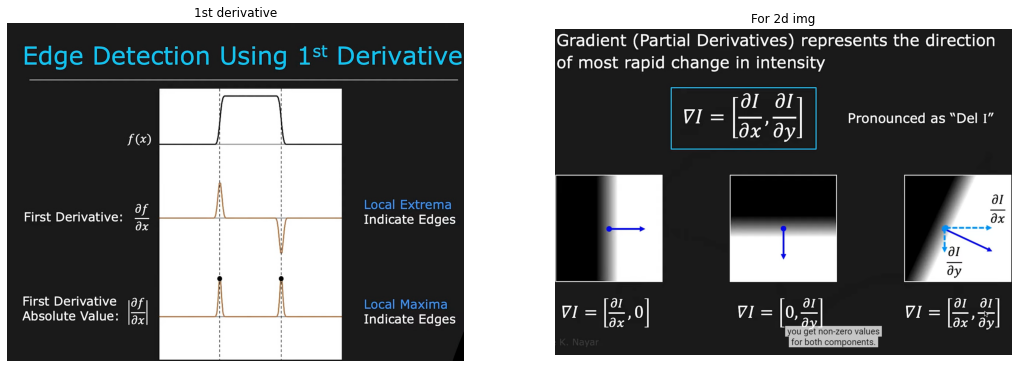

In [240]:
first_der = cv2.imread("/content/Edge(1st derivative).jpg")
for2d = cv2.imread("/content/lap_for_2d.png")
plt.figure(figsize=(18,10))
plt.subplot(121);plt.imshow(first_der);plt.axis('off');plt.title("1st derivative");
plt.subplot(122);plt.imshow(for2d);plt.title("For 2d img");plt.axis('off');plt.show()

# NOTE:

***cv2.filter2D is correlation not convolution, so using filter2d to convolve can give slightly different results, as in below image upper edge of upper lip is missing, while with proper convolve used in canny /from scratch/ (at bootom of the notebook ) uses proper convolve***

<Figure size 432x288 with 0 Axes>

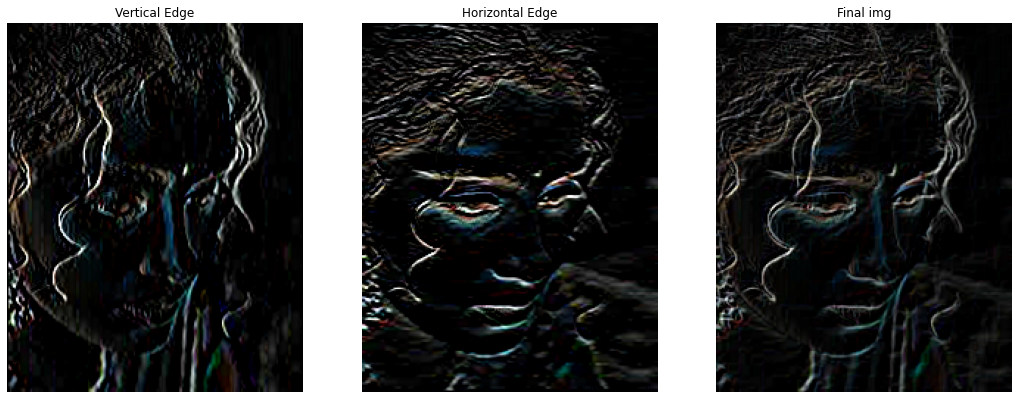

In [241]:
filter_v = np.array([[-1,0,1],[-1,0,1],[-1,0,1]]) # vertical edge # if 2x2 filter , f = np.array([[-1,1],[-1,1]])
filter_h = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
plt.figure()
ver_ed = cv2.filter2D(rgb_image,-1,filter_v)
hor_ed = cv2.filter2D(rgb_image,-1,filter_h) 
final_edge = cv2.addWeighted(ver_ed,0.5,hor_ed,0.5,0)
plt.figure(figsize=(18,10))
plt.subplot(131);plt.imshow(ver_ed);plt.axis('off');plt.title("Vertical Edge");
plt.subplot(132);plt.imshow(hor_ed);plt.title("Horizontal Edge");plt.axis('off');
plt.subplot(133);plt.imshow(final_edge);plt.title("Final img");plt.axis("off");plt.show()

First derivative laplacian operator gets peak at the edges but for second derivative it gets zeros at the edge. 

Filter for 2nd der lap: 
          
                        [[0 , 1 , 0],

                        [1 , -4 , 1],
                        
                        [0 , 1 , 0]]

Taking diagonal edges into consideration , the modified version of lap_2d :  

                        [[1 , 4 , 1],

                        [4 , -20 , 4],

                        [1 , 4 , 1]]

# Other edge detection techniques

***These uses different filters***

cv2.Sobel(Parameters)

Parameters

**src**: 	input image.

**dst**: 	output image of the same size and the same number of channels as src .

**ddepth**: 	output image depth, see combinations; in the case of 8-bit input images it will result in truncated derivatives.

**dx**: 	order of the derivative x.

**dy**: 	order of the derivative y.

**ksize**: 	size of the extended Sobel kernel; it must be 1, 3, 5, or 7.

**scale**: 	optional scale factor for the computed derivative values; by default, no scaling is applied (see getDerivKernels for details).

**delta**: 	optional delta value that is added to the results prior to storing them in dst.

**borderType**: 	pixel extrapolation method, see BorderTypes. BORDER_WRAP is not supported.

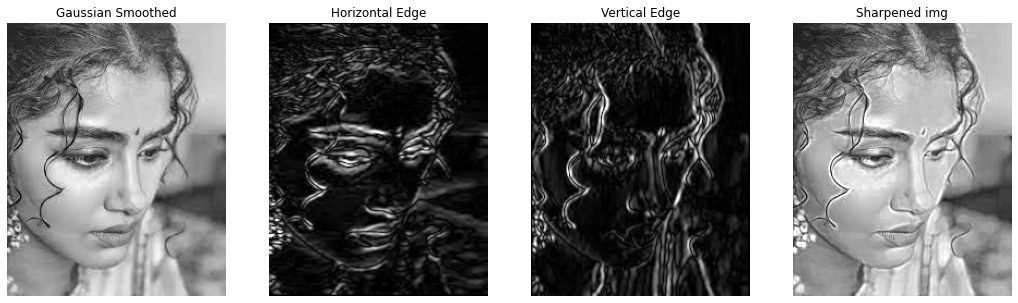

In [242]:
# sobel filter with gaussian smoothening
scale = 1
delta = 0
ddepth = cv2.CV_16S

gray = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)
# smoothed_img = cv2.GaussianBlur(gray, (3, 3),sigmaX=0) # to reduce noise
def gaussian_kernel(k_size, sigma): # github gaussian kernel source code
    center = k_size // 2
    x, y = np.mgrid[0 - center : center, 0 - center : center]
    g = 1 / (2 * np.pi * sigma) * np.exp(-(np.square(x) + np.square(y)) / (2 * np.square(sigma)))
    return g

smoothed_img = cv2.filter2D(gray,-1,gaussian_kernel(5,1)) # convolve gray image with gauss kernel


grad_x = cv2.Sobel(smoothed_img, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)# grad in x gives vertical edges

grad_y = cv2.Sobel(smoothed_img, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)# grad in x gives horizontal edges


abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)


grad = cv2.addWeighted(abs_grad_x, 0.3, abs_grad_y, 0.3, 0) # reducing the weight of grads to 0.3 from 0.5 to get proper image

plt.figure(figsize=(18,10))
plt.subplot(141);plt.imshow(gray,cmap="gray");plt.axis('off');plt.title("Gaussian Smoothed");
plt.subplot(142);plt.imshow(abs_grad_y,cmap="gray");plt.title("Horizontal Edge");plt.axis('off');
plt.subplot(143);plt.imshow(abs_grad_x,cmap="gray");plt.title("Vertical Edge");plt.axis("off");
plt.subplot(144);plt.imshow(cv2.add(gray,grad),cmap="gray");plt.title("Sharpened img");plt.axis('off');plt.show()

# Canny Edge Detector

The Canny edge detection algorithm is composed of 5 steps:

> Noise reduction

> Gradient calculation

> Non-maximum suppression

> Double threshold

> Edge Tracking by Hysteresis.

In [243]:
def noise_reduction(img):
  '''
     Input: gray image
  '''
  smoothen_img = cv2.filter2D(gray,-1,gaussian_kernel(3,1))
  return smoothen_img

def gradient_calculation(img): # sobel edge detection
  '''
  Input: gray image 
  > Calculating Gradients to find edge intensity and direction
  > Using Sobel filters
  > Outcome has pixel value between 0-255 , hence intensity is not constant (edge should have value 255)
  '''
  kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
  kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

  sobel_filtered_image = np.zeros(img.shape,dtype=np.uint8)
  theta = np.zeros(img.shape,dtype=np.float32)
  for i in range(img.shape[0] - 2):
    for j in range(img.shape[1] - 2):
        gx = np.sum(np.multiply(kernel_x, img[i:i + 3, j:j + 3]))  # x direction
        gy = np.sum(np.multiply(kernel_y, img[i:i + 3, j:j + 3]))  # y direction
        sobel_filtered_image[i+1,j+1] = np.hypot(gx, gy)
        theta[i+1,j+1] = np.arctan2(gy,gx)
  
  # grad_x = cv2.filter2D(img, -1, kernel_x)
  # grad_y = cv2.filter2D(img, -1, kernel_y)

  # grad_x = cv2.convertScaleAbs(grad_x)
  # grad_y = cv2.convertScaleAbs(grad_y)

  # grad_mag = np.hypot(grad_x,grad_y)
  # img = grad_mag.astype(np.uint8)
  # theta = np.arctan2(grad_y, grad_x)
  
  return sobel_filtered_image, theta

def non_max_suppression(img,theta):
  '''
  There are some thick and thin edges (different intensity)
  Here we want to thin out the edges 
  '''
  result = np.zeros(img.shape,dtype=np.uint8)
  angle = theta * 180/np.pi

  for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
      neigh_1 = 255
      neigh_2 = 255
      angle[angle<0] += 180
      try:
        # for horizontal edges
        if (0 <= angle[i,j] <= 22.5) or (157.5 < angle[i,j] <= 180):
          neigh_1 = img[i,j-1]
          neigh_2 = img[i,j+1]

        # for right diagonal edges
        elif (22.5 < angle[i,j] <= 67.5):
          neigh_1 = img[i-1,j+1]
          neigh_2 = img[i+1,j-1]

        # for vertical edges
        elif (67.5 < angle[i,j] <= 112.5):
          neigh_1 = img[i-1,j]
          neigh_2 = img[i+1,j]

        # for left diagonal edges
        elif (112.5 < angle[i,j] <= 157.5):
          neigh_1 = img[i-1,j-1]
          neigh_2 = img[i+1,j+1]

        # if any(in stated direction) neighbour pixel has more intensity then set the original pixel to 0 (black) 
        if (img[i,j] >= neigh_1) and (img[i,j] >= neigh_2):
          result[i,j] = img[i,j]

        else:
          result[i,j] = 0

      except IndexError as e:
        pass

  return result

def double_threshold(img,low_thresh, high_thresh):
  """
  Categorizing pixels into strong, weak and non-relevant pixels
  """
  result = np.zeros(img.shape,dtype=np.uint8)

  strong = np.uint8(255)
  weak = np.int32((low_thresh+high_thresh)//2)

  strong_i, strong_j = np.where(img >= high_thresh) 
  weak_i, weak_j = np.where((img <= high_thresh) & (img >= low_thresh))

  result[strong_i, strong_j] = strong
  result[weak_i, weak_j] = weak
  
  return result, weak, strong
  
def hysteresis(img, weak, strong):
  '''
  If any(out of 8) of the pixel around the weak pixel is strong, convert it into strong pixel  
  '''
  res = img.copy()
  for i in range(1,res.shape[0]-1):
    for j in range(1,res.shape[1]-1):
      if (res[i,j] == weak):
        try:
          if ((res[i-1,j-1] == strong) or (res[i-1,j] == strong) or (res[i-1,j+1] == strong) or (res[i,j-1] == strong) or (res[i,j+1] == strong) 
                                                              or (res[i+1,j-1] == strong) or (res[i+1,j] == strong) or (res[i+1,j+1] == strong)):
            res[i,j] = strong

          else:
            res[i,j] = 0

        except IndexError as e:
          pass

  return res

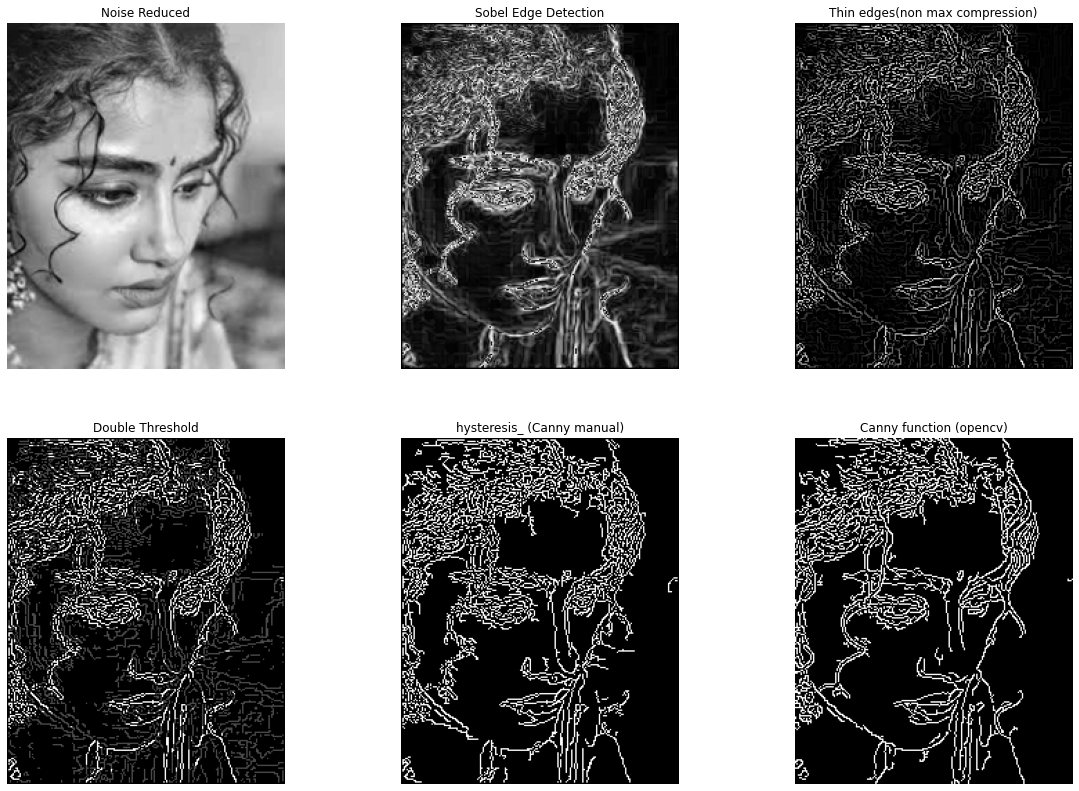

In [244]:
noise_red_img = noise_reduction(gray)
grads, theta = gradient_calculation(gray)
thin_edges_img = non_max_suppression(grads,theta)
thr, w, s = double_threshold(thin_edges_img, 30, 120)
hysteresis_ = hysteresis(thr, w, s)
canny = cv2.Canny(gray, 80, 170)

plt.figure(figsize=(20,14))
plt.subplot(231); plt.imshow(noise_red_img,cmap="gray"); plt.axis("off"); plt.title("Noise Reduced");
plt.subplot(232); plt.imshow(grads,cmap="gray"); plt.axis("off"); plt.title("Sobel Edge Detection");
plt.subplot(233); plt.imshow(thin_edges_img,cmap="gray"); plt.axis("off"); plt.title("Thin edges(non max compression)");
plt.subplot(234); plt.imshow(thr,cmap="gray"); plt.axis("off"); plt.title("Double Threshold");
plt.subplot(235); plt.imshow(hysteresis_,cmap="gray"); plt.axis("off"); plt.title("hysteresis_ (Canny manual)");
plt.subplot(236); plt.imshow(canny,cmap="gray"); plt.axis("off"); plt.title("Canny function (opencv)");

plt.show()